## Home Assignment 1

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox 
from pandas.api.types import is_numeric_dtype

In [3]:
mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['figure.dpi'] = 150

## Problem 1

**(1) Read the dataset into computer’s memory. Convert it to a time series.**

In [4]:
#reading csv
df = pd.read_csv('retail.csv', header = 1)

In [5]:
#converting to ts
df['Month'] = pd.to_datetime(df['Month'])
#df['Month'] = df['Month']                         
df.set_index('Month', inplace = True)
df = df.iloc[:,0:1]

In [760]:
df

,A3349335T
Month,
1982-04-01,303.1
1982-05-01,297.8
1982-06-01,298.0
1982-07-01,307.9
1982-08-01,299.2
...,...
2013-08-01,2244.2
2013-09-01,2157.0
2013-10-01,2299.5


**(2) Plot the A3349335T series. Does it seem to be stationary? Explain.**

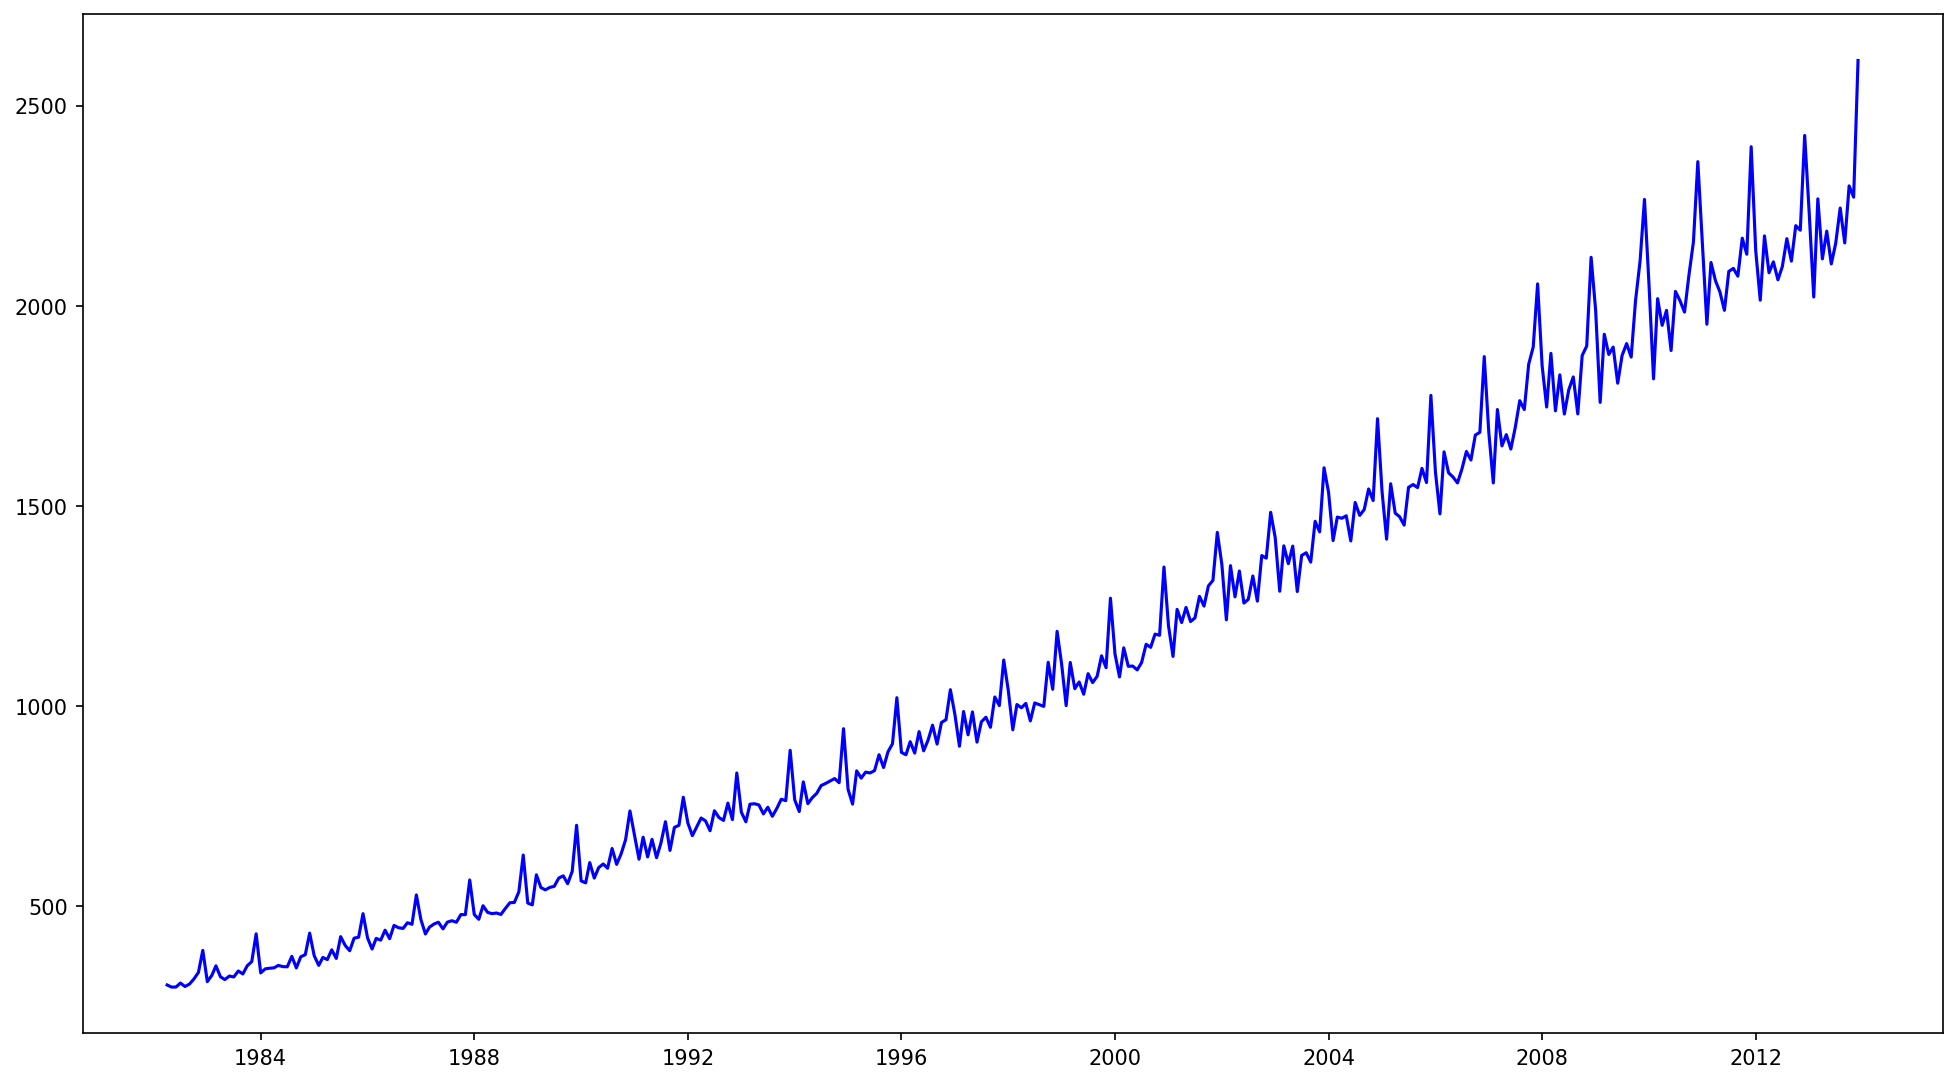

In [761]:
plt.plot(df['A3349335T'], color="blue")
#plt.ylim([0, 2500])
#надо разобраться со шкалой 

Ряд даннных не выглядит, как стационарный поо двую причинам:
* есть выраженный тренд
* разброс ряда мультиплиактивно увеличивается с ростом t

**3. Construct a series of month-to-month percentage changes for the for the A3349335T series. Also, construct a set of month-to-month logarithmic differences for the A3349335T series. Plot both constructed series, and present their descriptive statistics (mean, variance, skewness, kurtosis etc.). Do they differ? Do they seem to be stationary now?**

In [762]:
#month-to-month percentage changes
df['pct_change'] = df['A3349335T'].pct_change()

In [763]:
#month-to-month logarithmic differences for the A3349335T series.
df['log_diff'] = np.log(df['A3349335T'])-np.log(df['A3349335T'].shift(1))

In [764]:
df

,A3349335T,pct_change,log_diff
Month,,,
1982-04-01,303.1,NaN,NaN
1982-05-01,297.8,-0.017486,-0.017641
1982-06-01,298.0,0.000672,0.000671
1982-07-01,307.9,0.033221,0.032682
1982-08-01,299.2,-0.028256,-0.028663
...,...,...,...
2013-08-01,2244.2,0.041054,0.040234
2013-09-01,2157.0,-0.038856,-0.039631
2013-10-01,2299.5,0.066064,0.063973


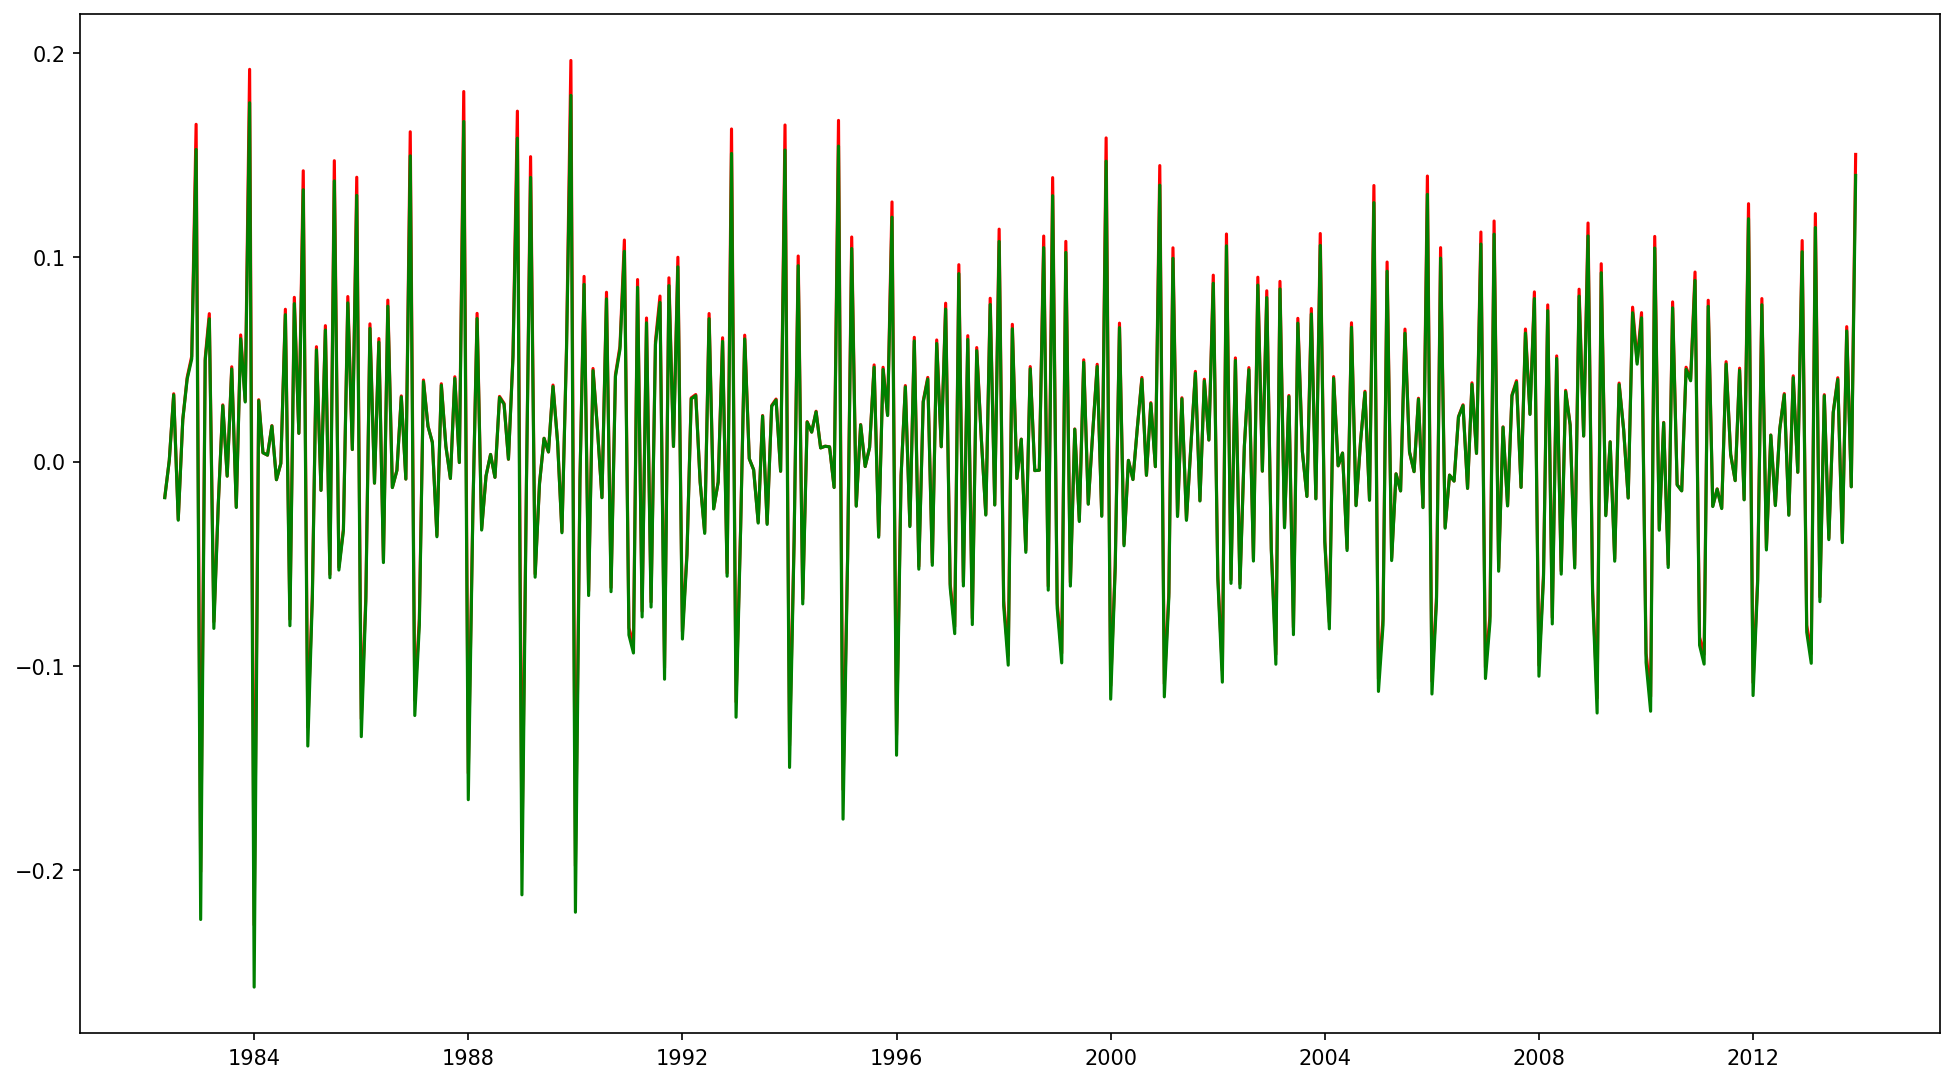

In [765]:
#Plot a series of month-to-month percentage changes and a set of month-to-month logarithmic differences 
fig, ax = plt.subplots()

ax.plot(df['pct_change'], color = 'red')
ax.plot(df['log_diff'], color = 'green')

In [766]:
#Descriptive statistics
df[['pct_change', 'log_diff']].agg(['mean', 'median', 'max', 'std', np.var,'skew','kurtosis'])

,pct_change,log_diff
mean,0.008137,0.005669
median,0.005447,0.005432
max,0.196319,0.179249
std,0.070126,0.070108
var,0.004918,0.004915
skew,-0.024762,-0.280277
kurtosis,0.335007,0.623303


Do they differ? Do they seem to be stationary now?

По графику два ряда мало расходятся, видно, что общий паттерн повторяется. 
По статистическим характеристикам разнится только куртозис, остальные же статистики практически равны. 
За исключением некоторых выбросов в начале ряда, по графику он выглядит, как стационарный 

**4) Plot the autocorrelation and partial autocorrelation functions for the percentage changes series. Do they decay fast enough? Is there something that make us thing that the series is not stationary?**

In [767]:
df['pct_change'].dropna()
#requared to plot acf, pacf

Month
1982-05-01   -0.017486
1982-06-01    0.000672
1982-07-01    0.033221
1982-08-01   -0.028256
1982-09-01    0.020722
                ...   
2013-08-01    0.041054
2013-09-01   -0.038856
2013-10-01    0.066064
2013-11-01   -0.012264
2013-12-01    0.150354
Name: pct_change, Length: 380, dtype: float64

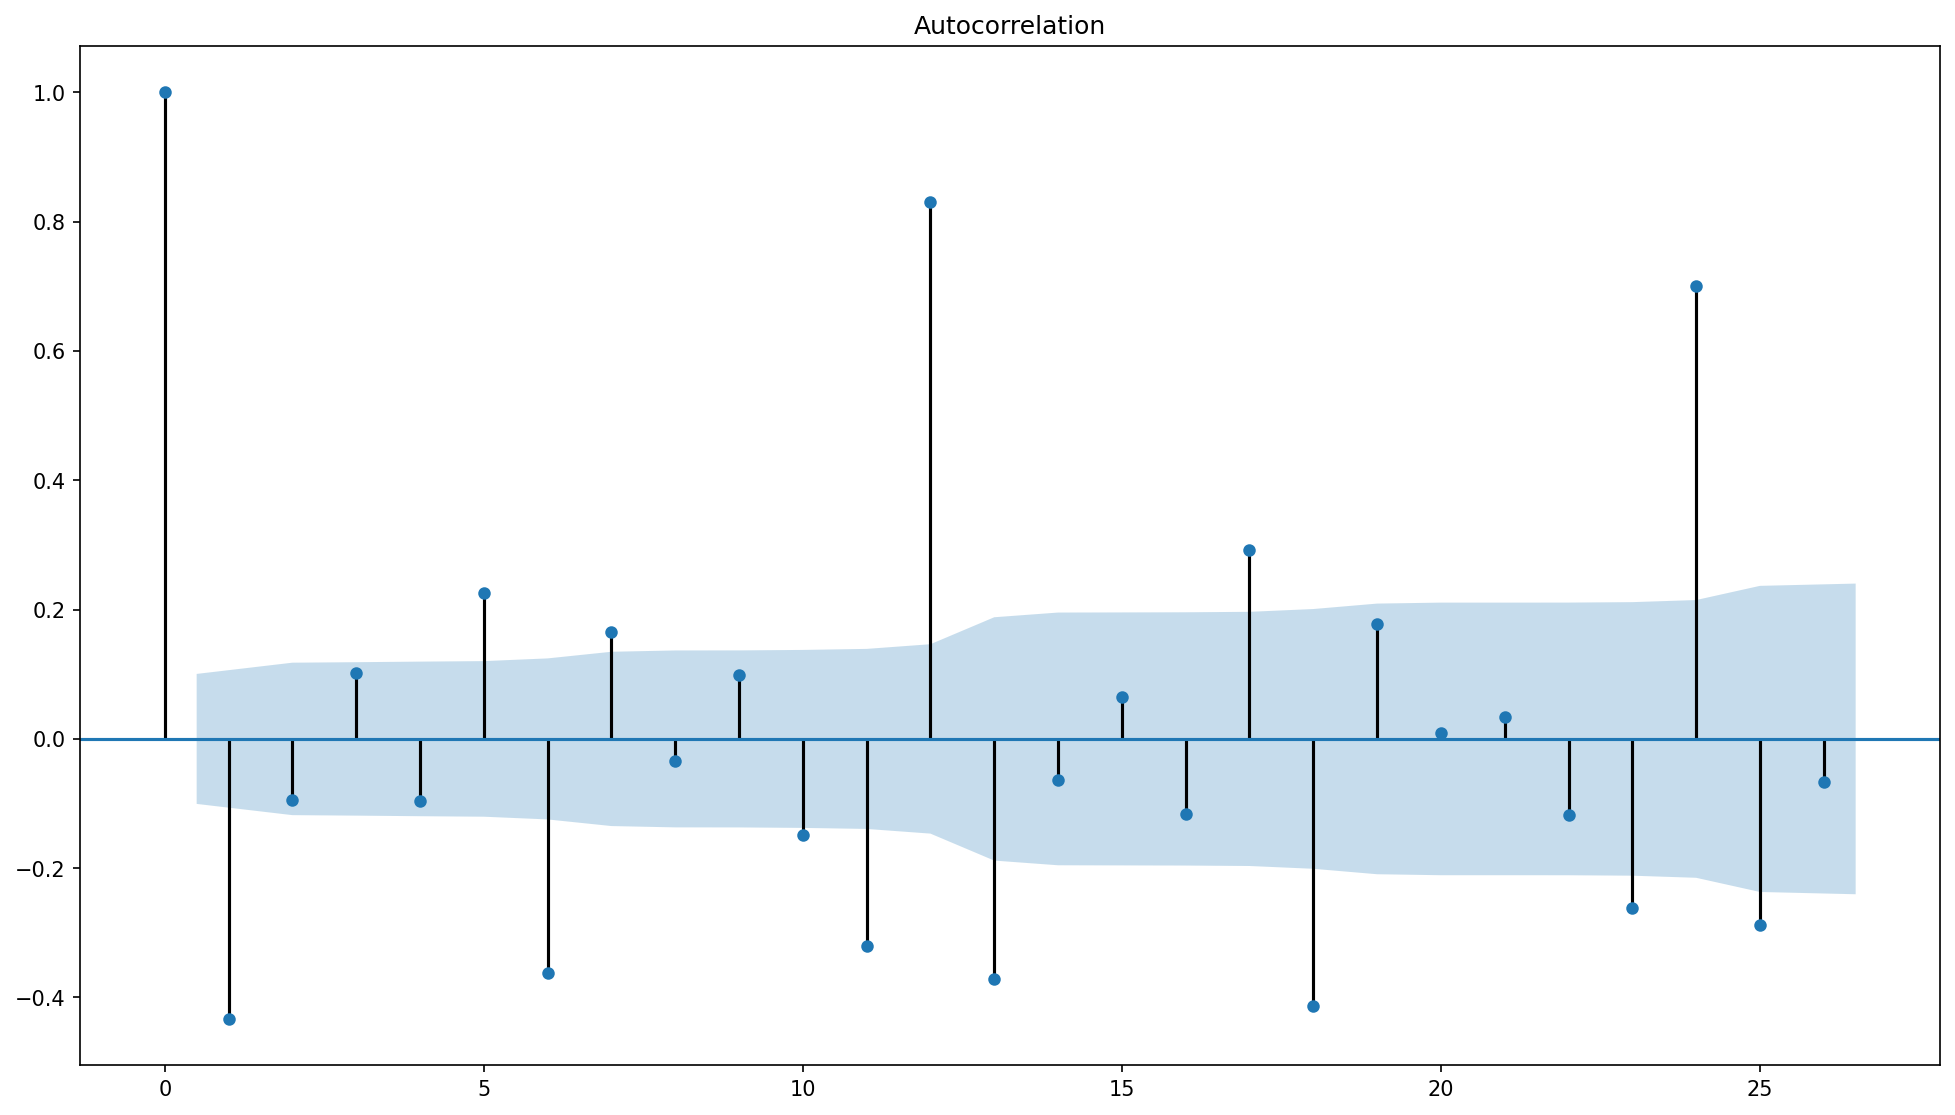

In [768]:
df_acf_pacf =  df[1:]['pct_change']
plot_acf(df_acf_pacf)
plt.show()

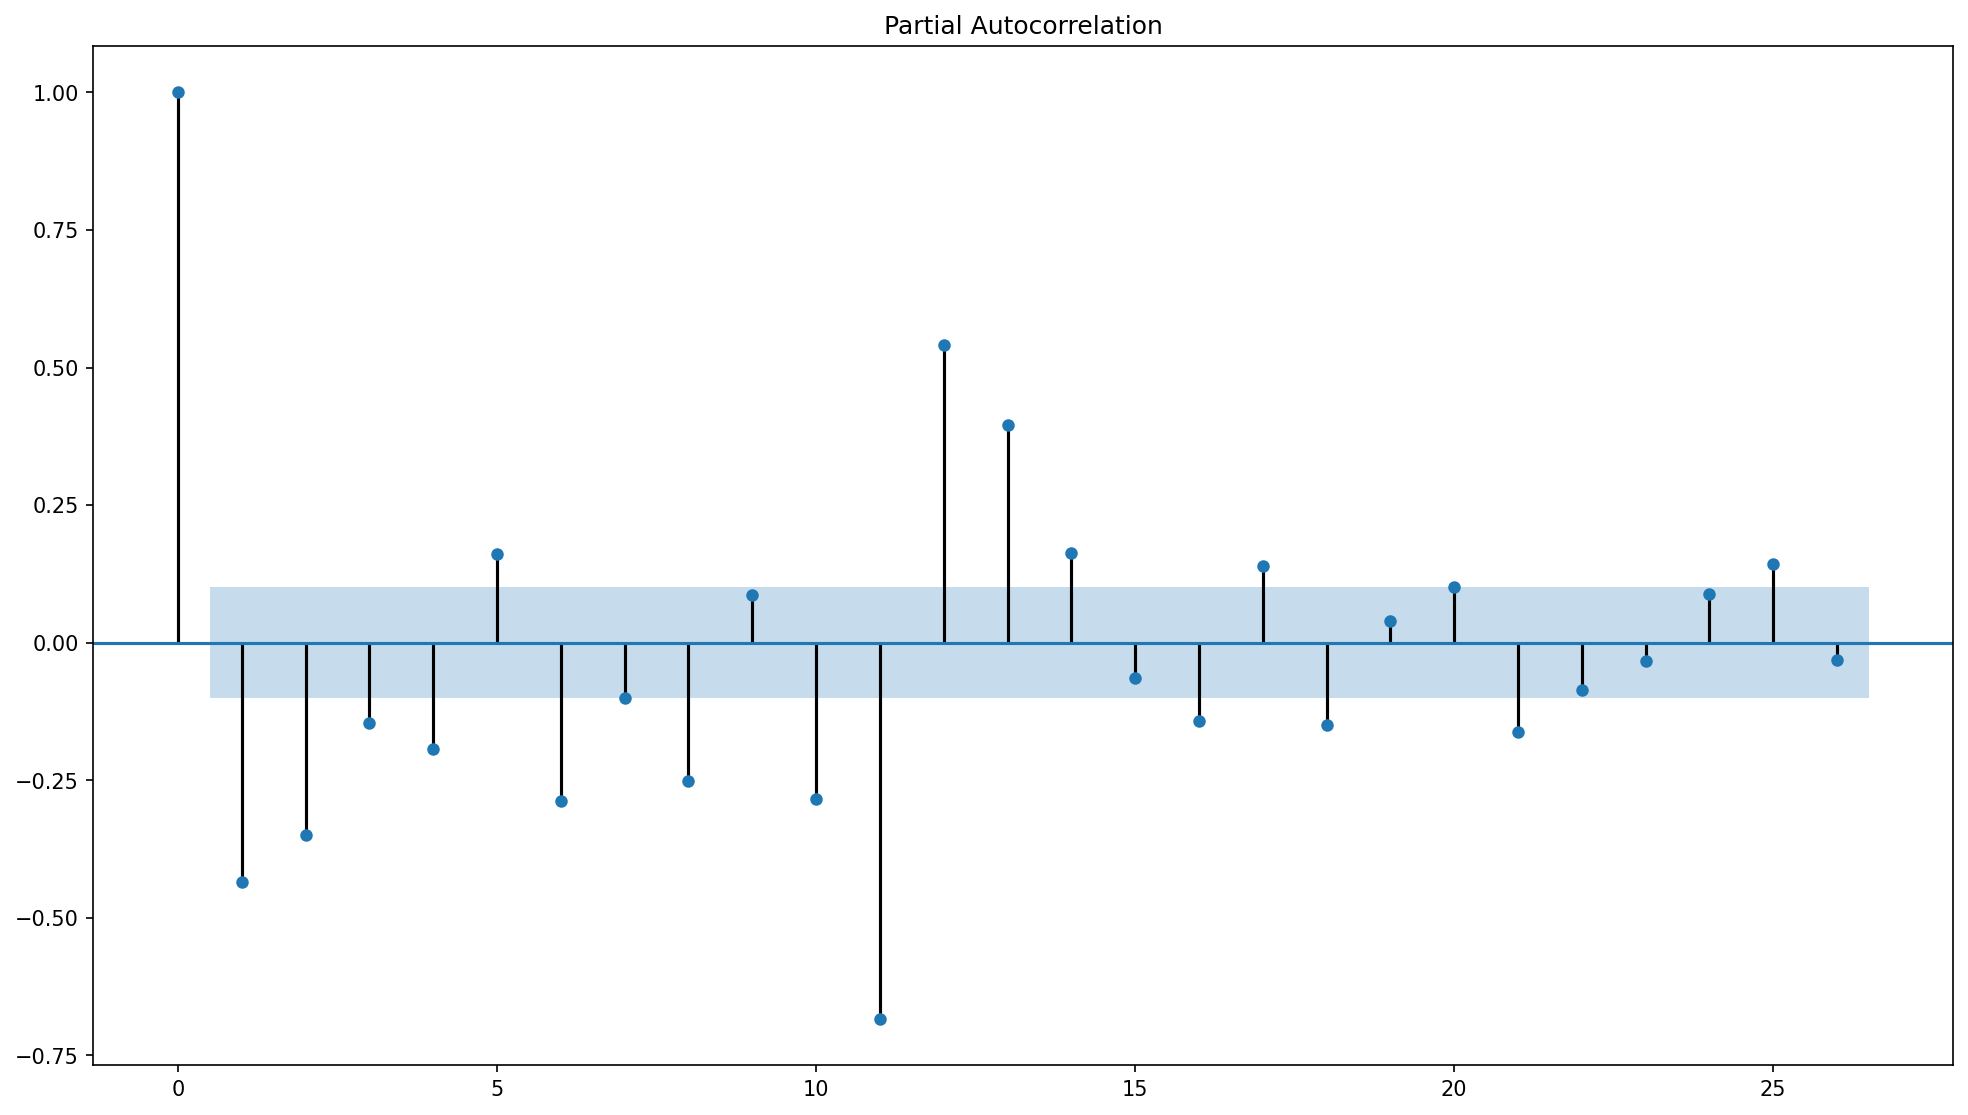

In [769]:
plot_pacf(df_acf_pacf)

plt.show()

Автокорреляционная и частная автокорреляционная функции не обрываются, присутсвуют выбросы, из чего можно сделать вывод, что ряд похож на нестационарный. 
Выбросы на графикках автокорреляционной и частной автокорреляционной функций говорит о том, что коэффициенты ковариации между значенииям в определенные временные промежутки не равны 0, ряд похож на нестацонарный или с присутсвующей сезонной составляющей(потому что выбросы похоже имеют такой патерн).

**(5) Now construct a series of year-to-year percentage changes for for the A3349335T series. Also, plot the constructed series and its ACF and PACF. Do the plots look better than the one in (4)? Why?**

In [770]:
#year-to-year percentage changes
df['pct_change_y2y'] = df['A3349335T'].pct_change(periods=12)

In [771]:
df.head(n=23)

,A3349335T,pct_change,log_diff,pct_change_y2y
Month,,,,
1982-04-01,303.1,NaN,NaN,NaN
1982-05-01,297.8,-0.017486,-0.017641,NaN
1982-06-01,298.0,0.000672,0.000671,NaN
1982-07-01,307.9,0.033221,0.032682,NaN
1982-08-01,299.2,-0.028256,-0.028663,NaN
1982-09-01,305.4,0.020722,0.020510,NaN
1982-10-01,318.0,0.041257,0.040429,NaN
1982-11-01,334.4,0.051572,0.050286,NaN
1982-12-01,389.6,0.165072,0.152783,NaN


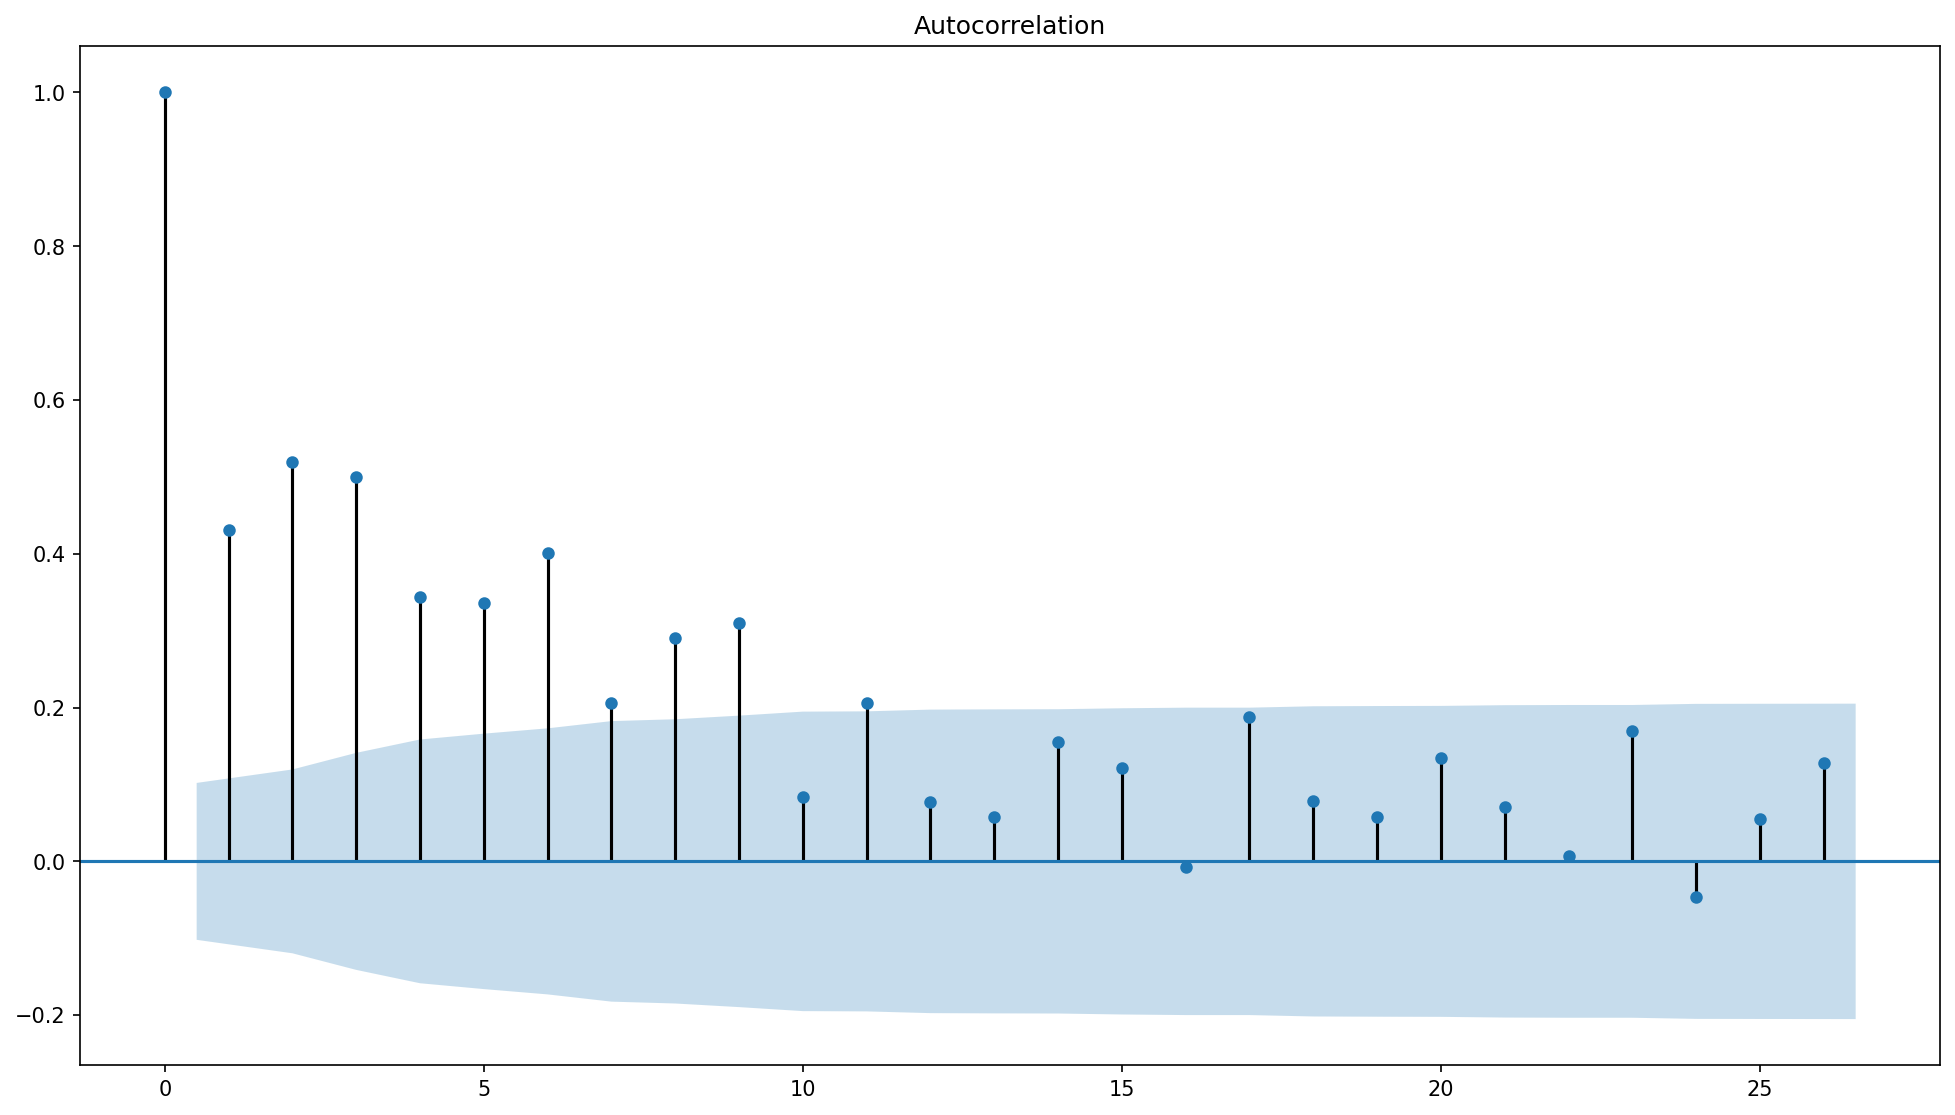

In [772]:
df_2_acf_pacf =  df[12:]['pct_change_y2y']
plot_acf(df_2_acf_pacf)
plt.show()

Авокорреляцонная функция медленно убывает, это может наталкивать нас на мысль, что свойсво эргодичности может и не выполнено и ряд всё еще нестационарный. Однако у ACF всё же присутсвует тренд на убывание, в отличие от прошлого пункта. 

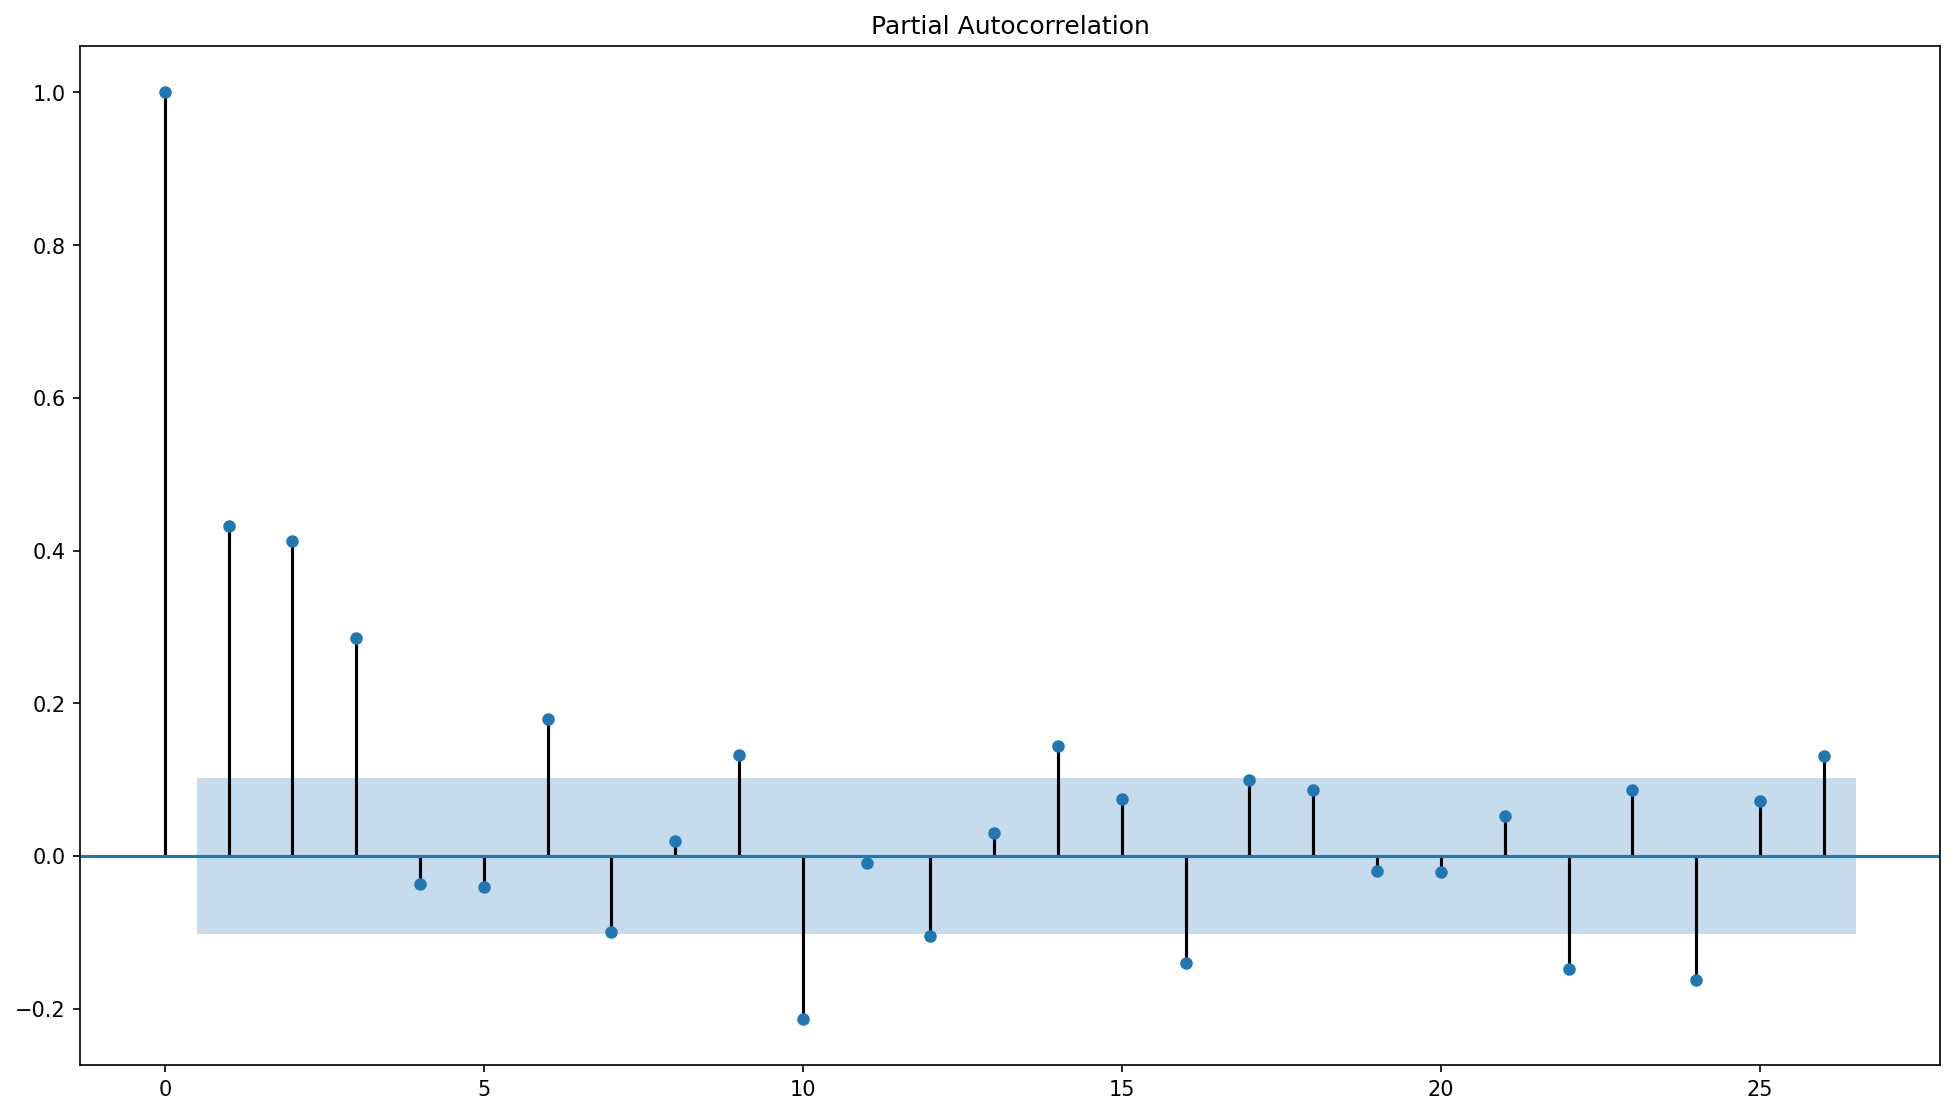

In [773]:
plot_pacf(df_2_acf_pacf)

plt.show()

Частная автокоррелляционная функция обрывается после 3его порядка, соответсвенно, можно проверить процесс AR(3). Присутсвующие выбросы на 10ом и 20ых подводят нас к тому, что аналза по acf, pacf недостаточно. 

## Problem 2

**(1) Read the dataset into computer’s memory. Convert it to a time series. Notice that the data are reverse-sorted, so the latest dates come first.**

In [774]:
#Read csv
df = pd.read_csv('eurusd.csv')

In [775]:
df

,month,avgeurusd,mineurusd,maxeurusd,workdays
0,12/2019,1.111345,1.1023,1.1234,20
1,11/2019,1.105095,1.0982,1.1158,21
2,10/2019,1.105257,1.0898,1.1173,23
3,9/2019,1.100390,1.0889,1.1096,21
4,8/2019,1.112623,1.1036,1.1222,22
...,...,...,...,...,...
247,5/1999,1.062810,1.0456,1.0799,21
248,4/1999,1.070441,1.0581,1.0867,22
249,3/1999,1.088296,1.0692,1.1012,23
250,2/1999,1.120765,1.0969,1.1342,20


In [776]:
#convert to ts
df['month'] = pd.to_datetime(df['month'])                    
df.set_index('month', inplace = True)

In [777]:
#Sort data as the earliest dates come first.
df = df.sort_values(by="month", ascending=True)

**(2) Construct a set of continuously compounded monthly logarithmic returns for the average exchange rate. Plot it.**

In [778]:
df['avg_return'] = df['avgeurusd'].pct_change(periods = 1)+1

In [779]:
#continuously compounded monthly logarithmic returns
df['ccr'] = np.log(df['avg_return'])

In [780]:
df = df[1:]['ccr'].to_frame()
df

,ccr
month,
1999-02-01,-0.035325
1999-03-01,-0.029398
1999-04-01,-0.016542
1999-05-01,-0.007154
1999-06-01,-0.023857
...,...
2019-08-01,-0.008249
2019-09-01,-0.011056
2019-10-01,0.004413


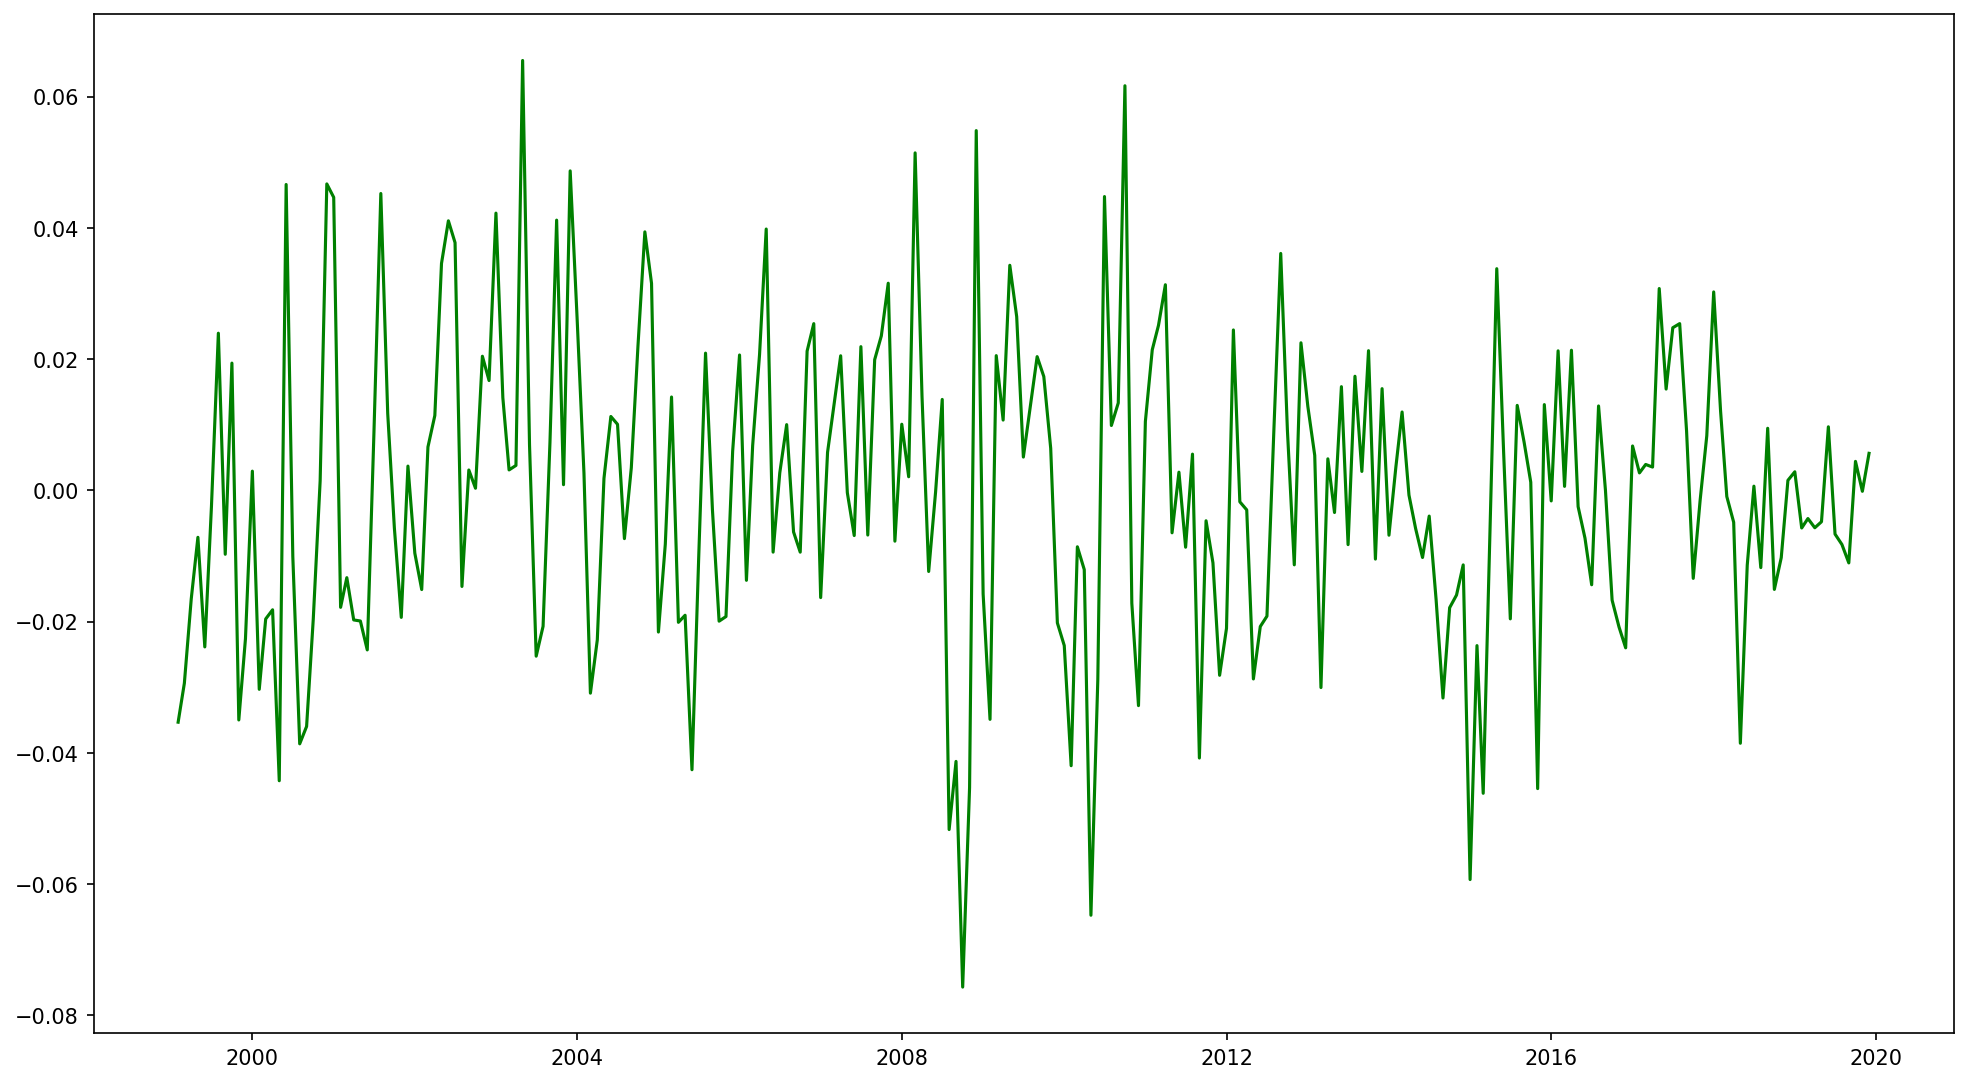

In [782]:
#Plot continuously compounded monthly logarithmic returns
plt.plot(df, color="green")

**(3) Examine the autocorrelation and partial autocorrelation functions. Show the corresponding graphs and a few values of the Ljung–Box statistics with an interpretation. Which ARMA model would you suggest based on the ACF and PACF analysis?**

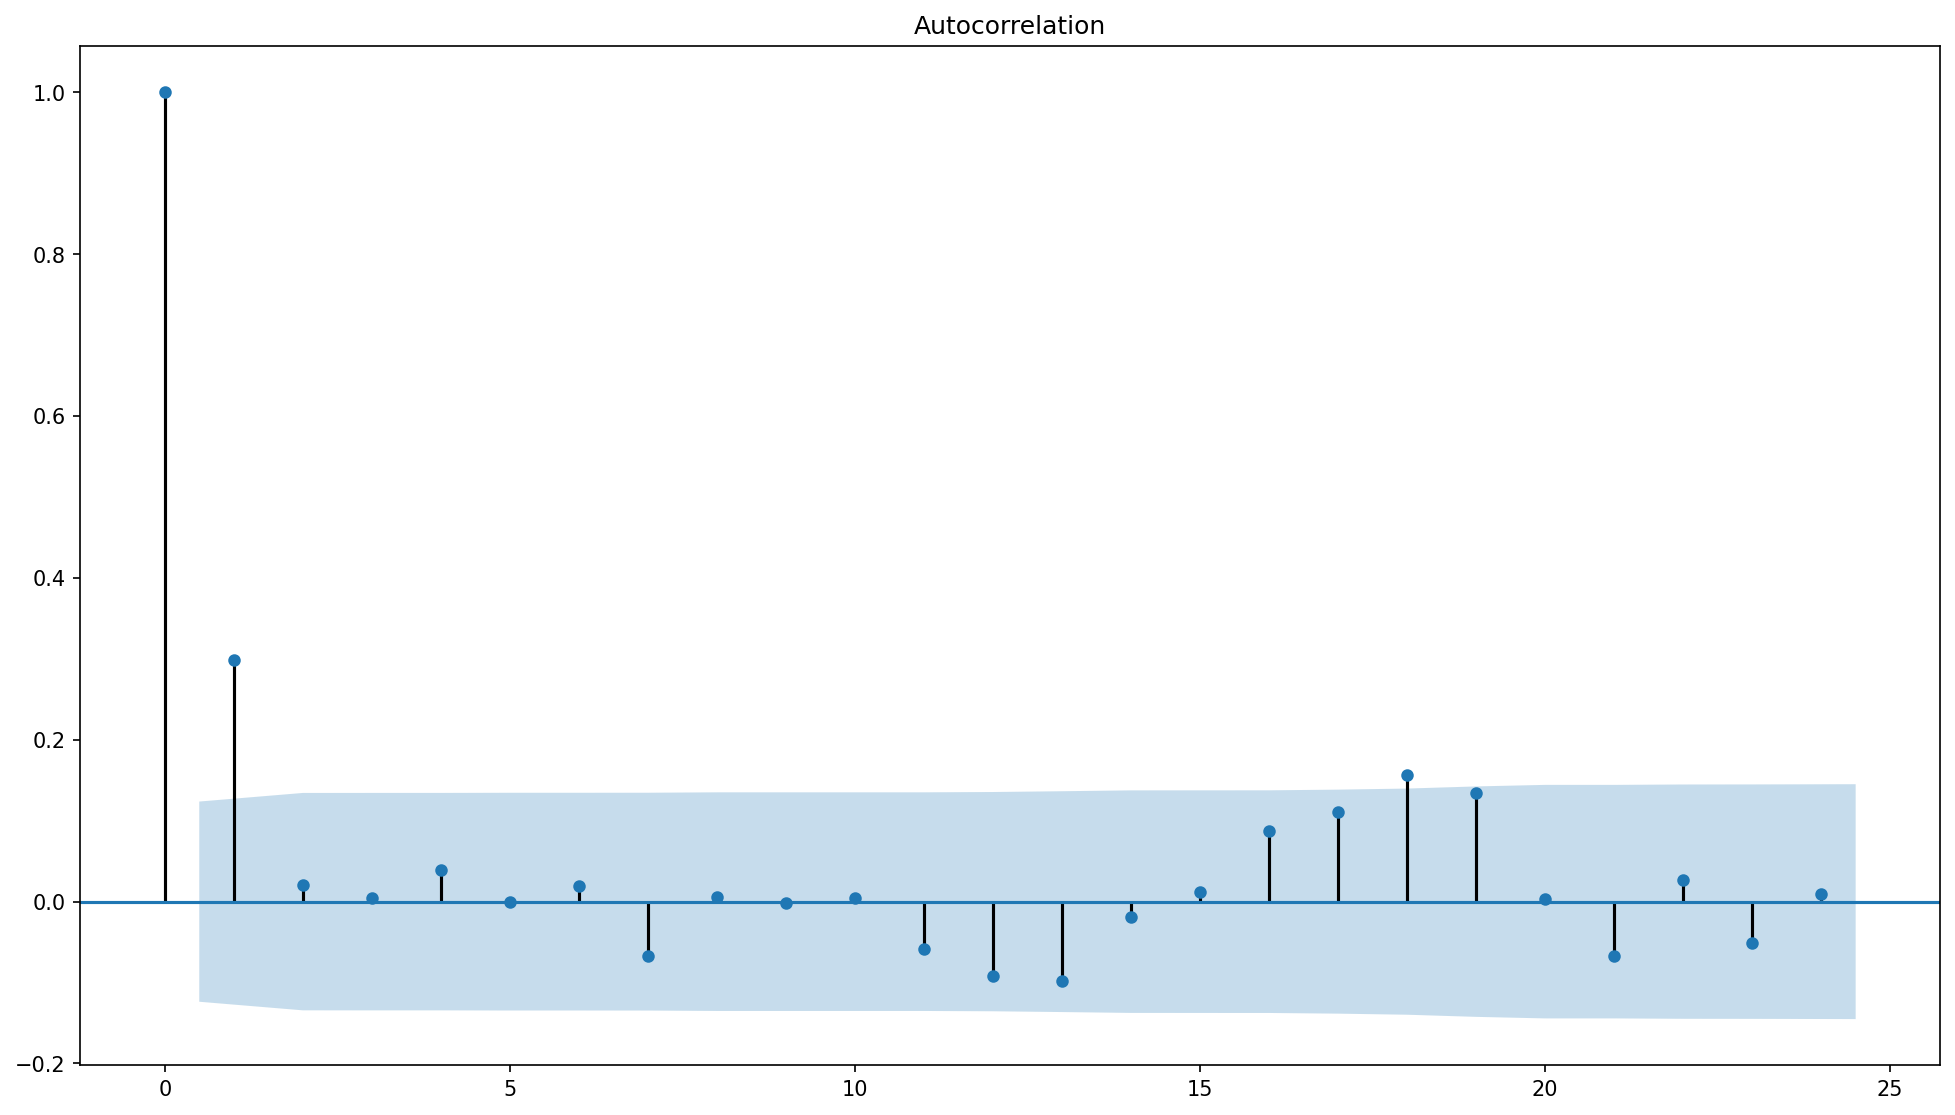

In [783]:
plot_acf(df)
plt.show()

Автокорреляционная функция обрывается после 1ого порядка, поэтому можно попробовать оценить MA(1) процесс

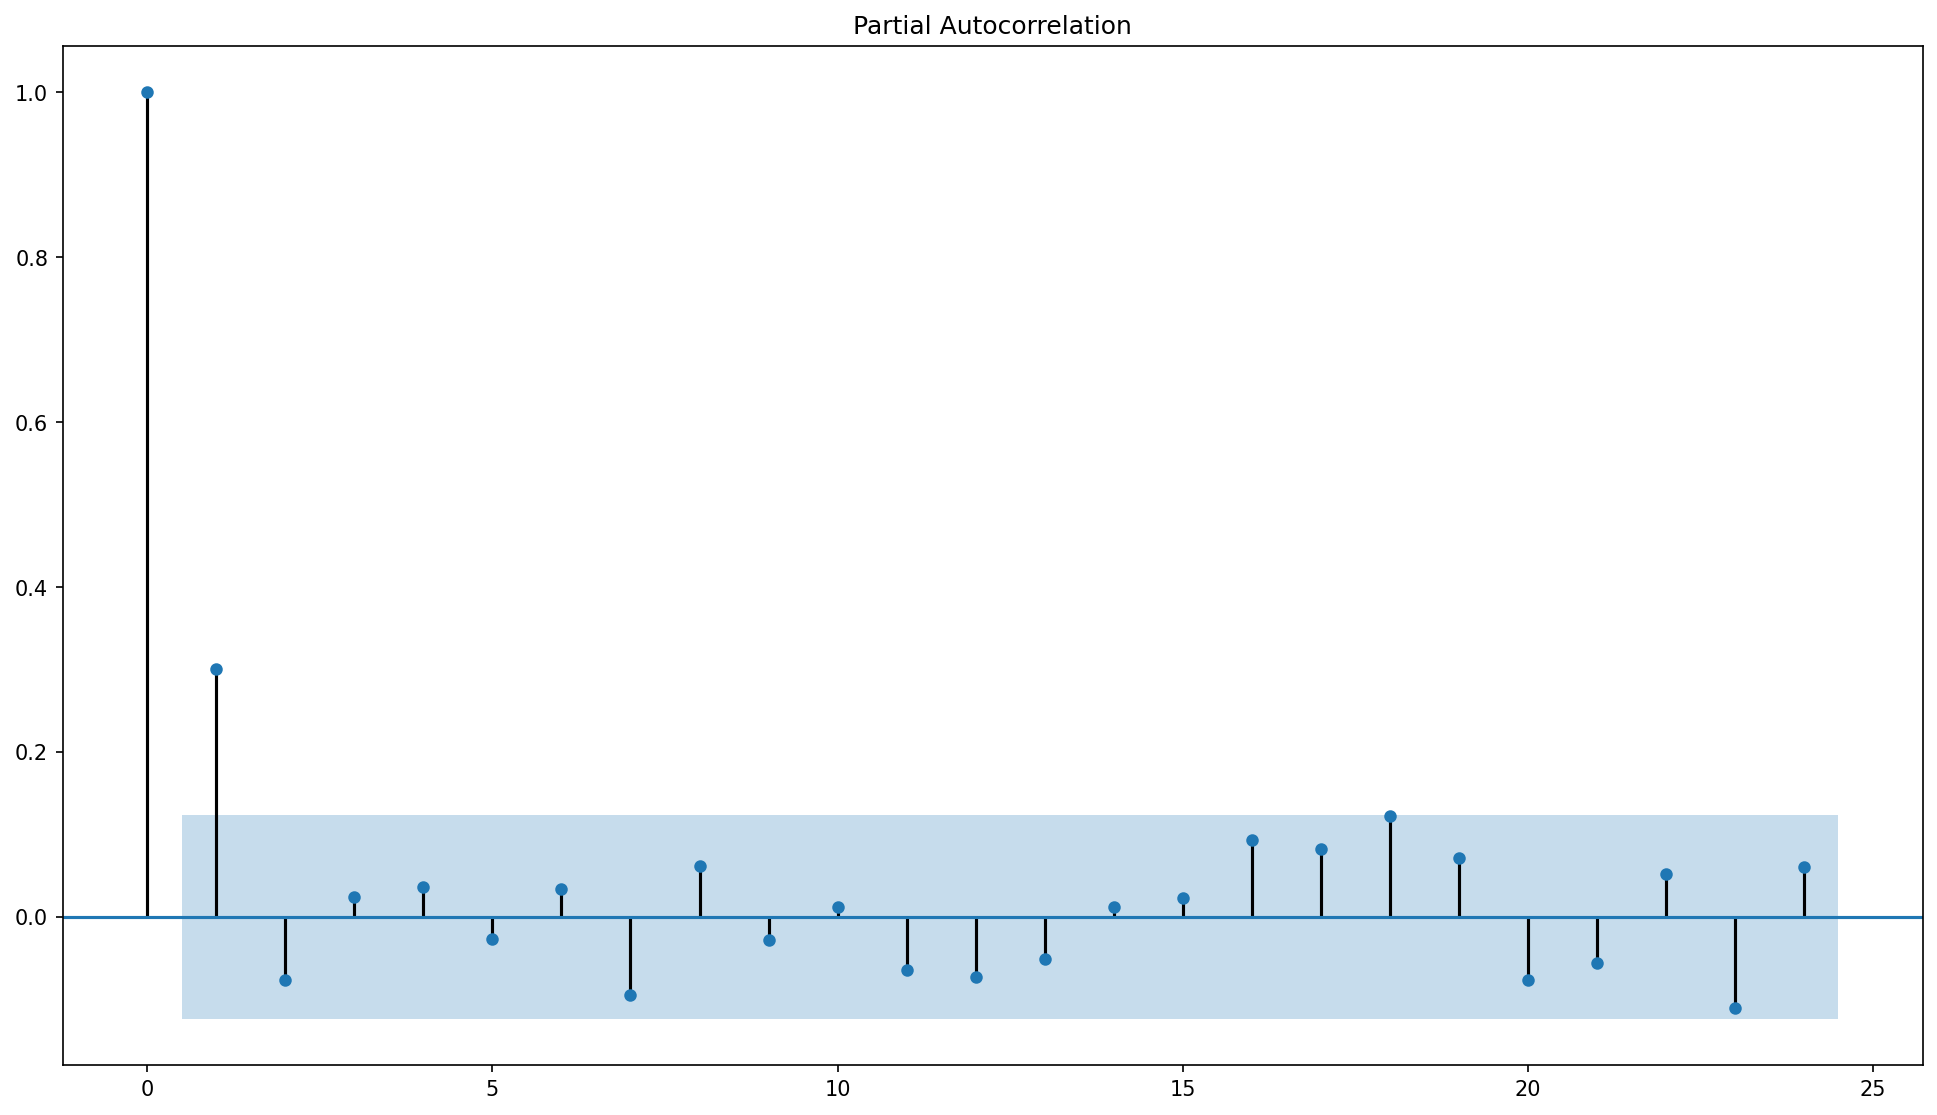

In [784]:
plot_pacf(df)
plt.show()

In [785]:
#res = sm.tsa.ARIMA(df[1:]['ccr'], (0,0,1)).fit(disp=-1)
#sm.stats.acorr_ljungbox(res.resid, lags=[1,2,3,4,5,6,7,8,9,10], return_df=True)

sm.stats.acorr_ljungbox(df, lags=[1,2,3,4,5,6,7,8,9,10], return_df=True)

,lb_stat,lb_pvalue
1,22.740838,0.000002
2,22.846143,0.000011
3,22.852620,0.000043
4,23.248740,0.000113
5,23.248840,0.000303
6,23.348447,0.000688
7,24.513315,0.000925
8,24.520877,0.001873
9,24.521284,0.003549
10,24.526432,0.006319


Тест Ljung-Box проверяет гипотезу H0: t_k = corr(Х_t, Х_t+k) = 0 k = 1...m о равенстве нулю коэффициентов корреляции. По подсчитанным значениям мы видим, что p-value малы, значит нулевая гипотеза об отсутсвии автокорреляции отвергается. 

На основе ACF, PACF стоит провериь модель ARMA(1,1), так как и ACF, и PACF, обрываются на 1ом лаге. 

**4) Estimate all ARMA models of order (𝑝, 𝑞) for all 𝑝 ≥ 0, 𝑞 ≥ 0, 𝑝 + 𝑞 ≤ 8. Show the information criteria AIC, BIC for all these estimated models.**

In [786]:
df_results = pd.DataFrame(columns =['p', 'q', 'AIC', 'BIC', 'HQIC']) 
p = 0
q = 0
while p <= 8:
    q = 0
    while q <= 8:
        if q + p <= 8:
            arima = ARIMA(df, order=(p, 0, q)).fit()
            df_results = df_results.append({'p': p, 'q': q, 'AIC': arima.aic, 'BIC': arima.bic, 'HQIC': arima.hqic,}, ignore_index=True)
            
        q = q + 1
    
    p = p + 1       

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency informa

In [787]:
df_results 

,p,q,AIC,BIC,HQIC
0,0.0,0.0,-1180.095368,-1173.044462,-1177.257907
1,0.0,1.0,-1202.966093,-1192.389734,-1198.709902
2,0.0,2.0,-1201.249055,-1187.147243,-1195.574133
3,0.0,3.0,-1199.378085,-1181.750821,-1192.284433
4,0.0,4.0,-1198.105864,-1176.953146,-1189.593481
5,0.0,5.0,-1196.390426,-1171.712255,-1186.459312
6,0.0,6.0,-1195.741969,-1167.538345,-1184.392125
7,0.0,7.0,-1195.134213,-1163.405136,-1182.365639
8,0.0,8.0,-1193.169119,-1157.914589,-1178.981814
9,1.0,0.0,-1201.783154,-1191.206795,-1197.526962


**(5) Choose the most appropriate models based on each information criterion.**

In [788]:
print(df_results[df_results.AIC == df_results.AIC.min()])

     p    q          AIC          BIC         HQIC
1  0.0  1.0 -1202.966093 -1192.389734 -1198.709902


In [789]:
print(df_results[df_results.BIC == df_results.BIC.min()])

     p    q          AIC          BIC         HQIC
1  0.0  1.0 -1202.966093 -1192.389734 -1198.709902


Наилучшей спецификации модели соответсвуют наименьшие AIC, BIC
Таковой моделью на основе AIC, BIC яляется ARMA(0,1)

**(6) The ARMA specification requires the model residuals to be a white noise. How can you test this requirement for the chosen models? Do the residuals indeed follow a white noise
process?**

Проверить остатки на соответсвие WN можно двмя способами:
* графический - график остатков, гистограмму распределения 
* тест ljungbox

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


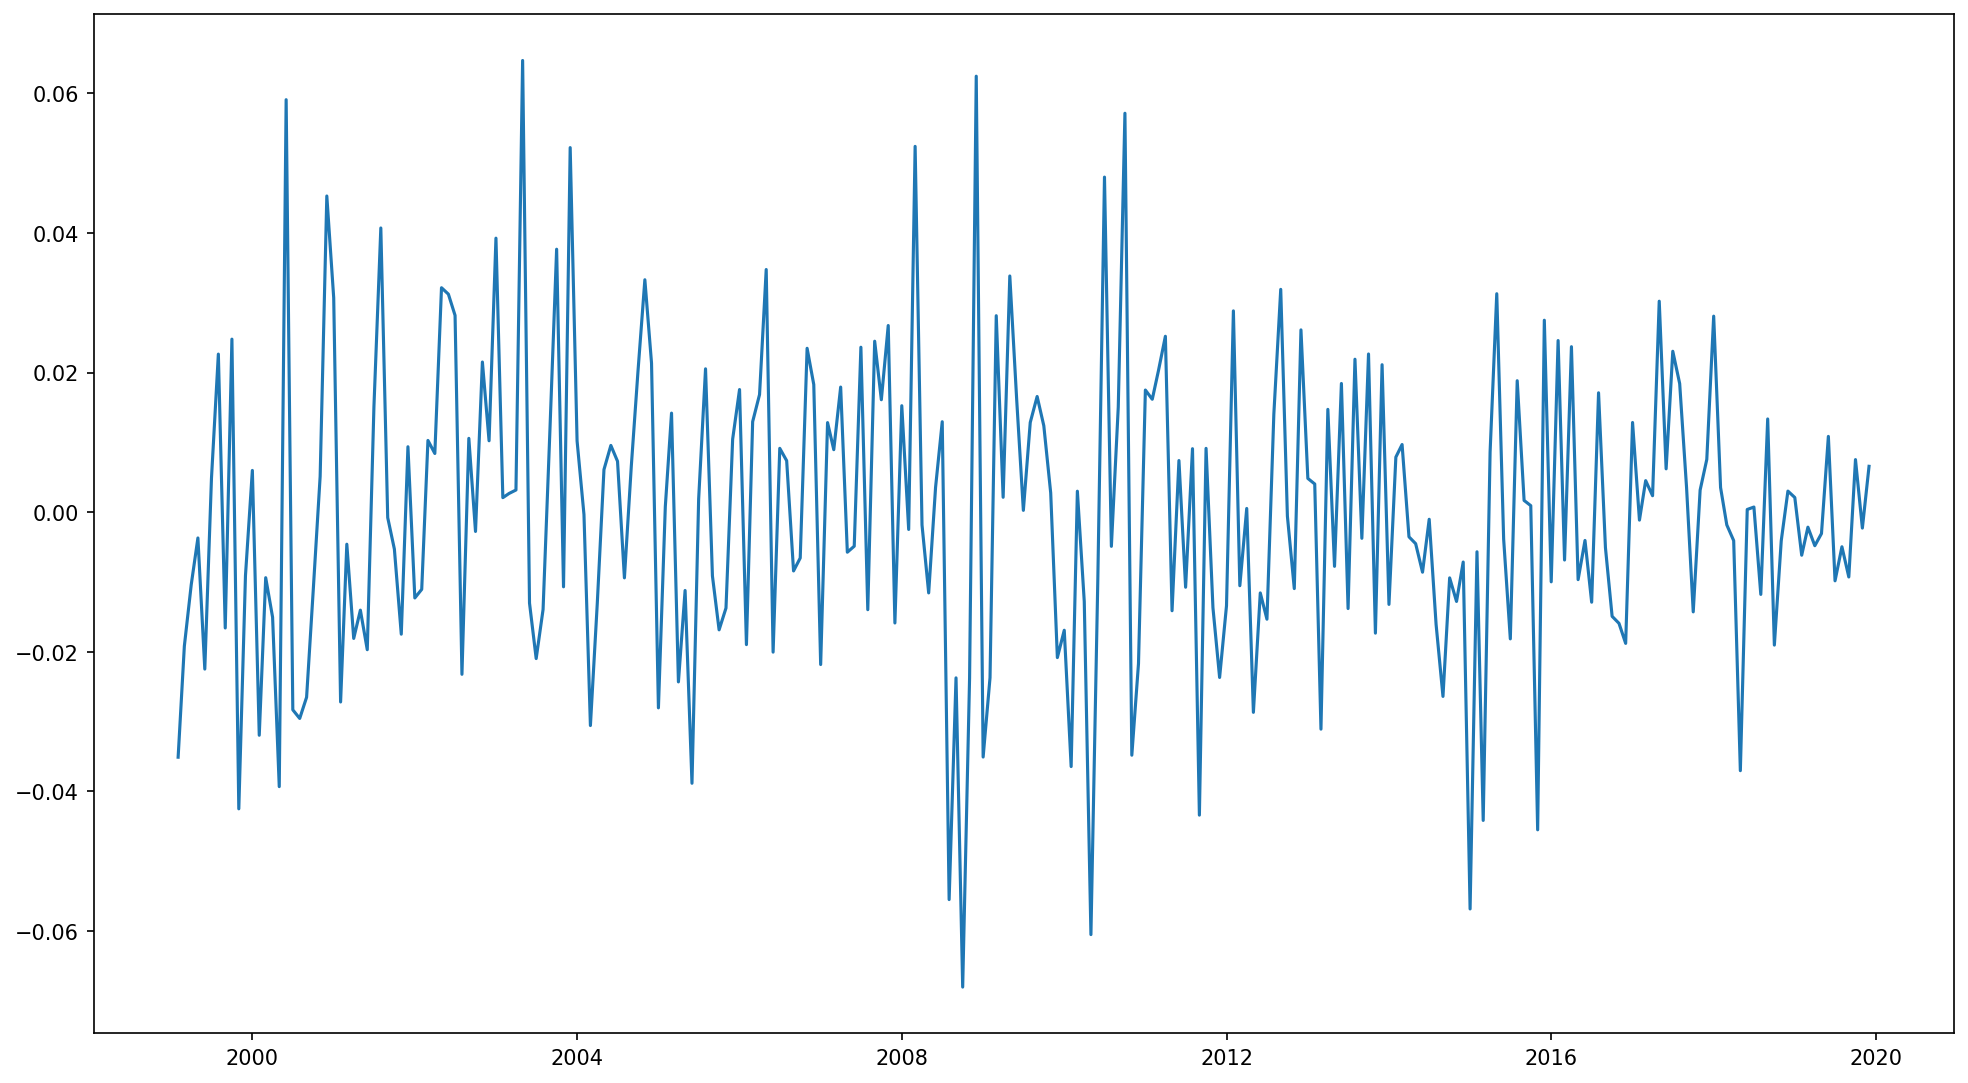

In [790]:
arima_01 = ARIMA(df, order=(0, 0, 1)).fit()
plt.plot(arima_01.resid)
plt.show()

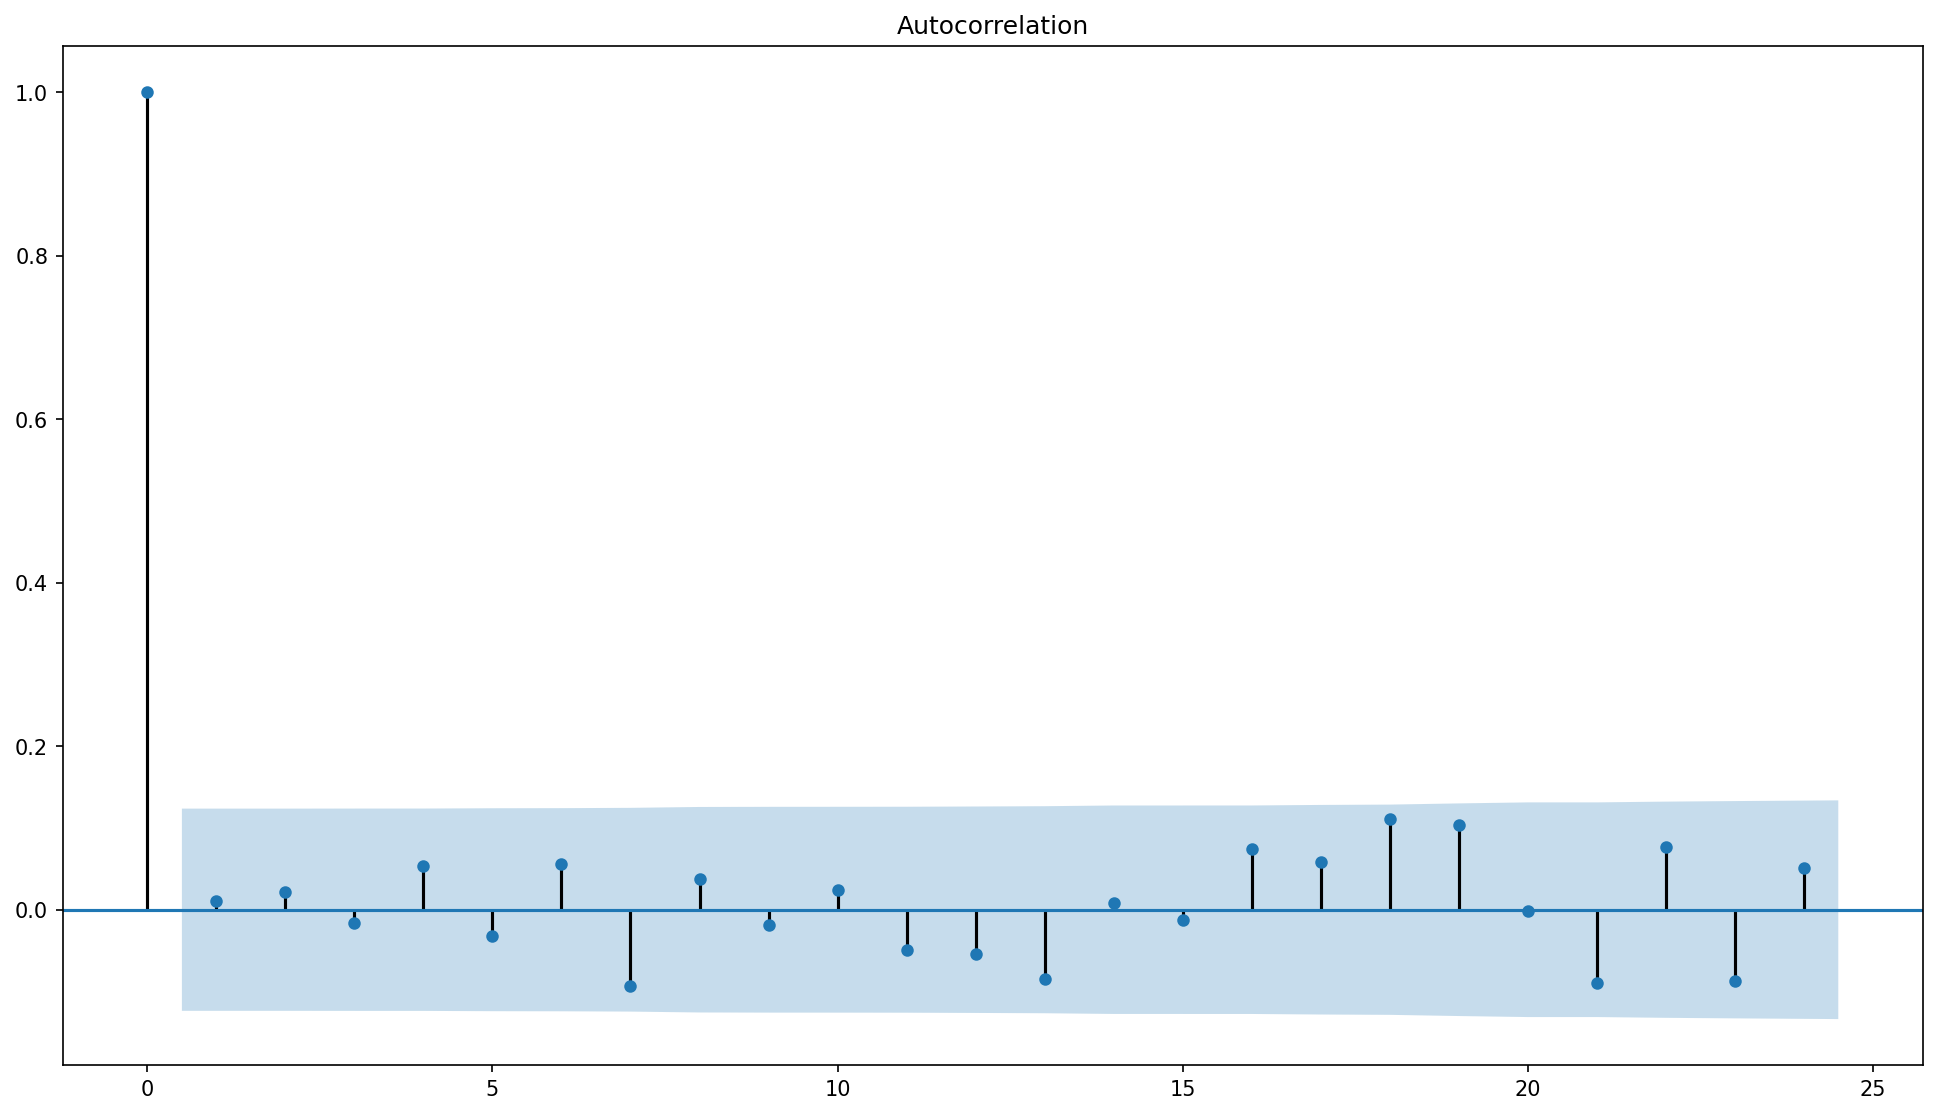

In [791]:
plot_acf(arima_01.resid)
plt.show()

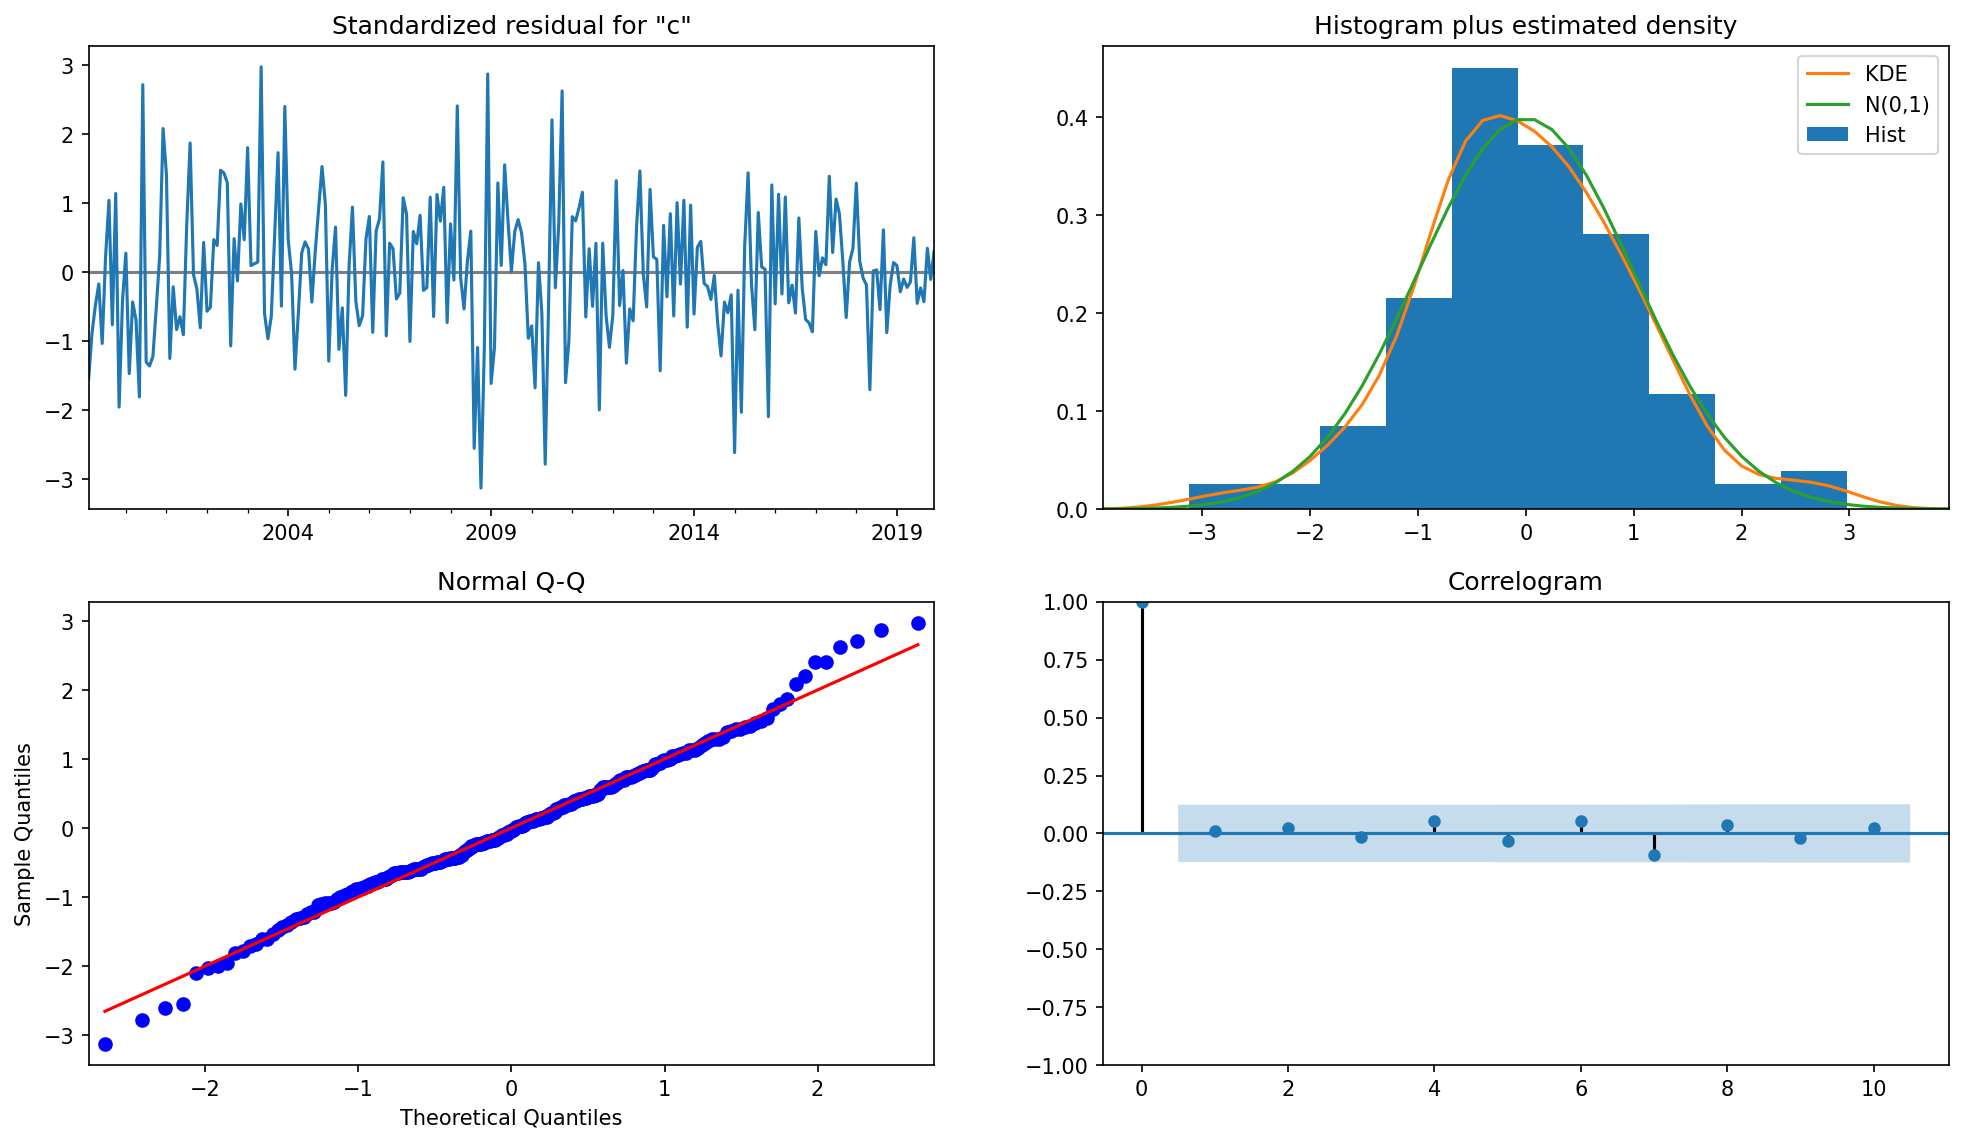

In [792]:
arima_01.plot_diagnostics()
plt.show()

Первый способ - графический, показывает, что остатки, как и WN процесс имеют математическое ожидание 0 и постоянную дисперсию. В целом, график остатков похож на белый шум. Распределение остатков близко к N(0,1)

In [793]:
res = arima_01.resid
pd.DataFrame(acorr_ljungbox(res)).T

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,0,1
0,0.027735,0.867734
1,0.152244,0.926703
2,0.218116,0.974613
3,0.937557,0.919112
4,1.197715,0.945096
5,1.992435,0.920393
6,4.277415,0.747328
7,4.646317,0.794622
8,4.737386,0.856574
9,4.886085,0.898656


Тест Ljung-Box проверяет гипотезу H0: t_k = corr(E_t, E_t+k) = 0 k = 1...m о равенстве нулю коэффициентов корреляции между остатками. По подсчитанным значениям мы видим, что p-value большие, значит нулевая гипотеза об отсутсвии автокорреляции не отвергается.  

**(7) Consider the model chosen based on the AIC value and the model selected via the BIC
value. Estimate them using data from the beginning of the data to December 2018.**

In [794]:
#remove values for further forcasting
df_arma_cut = df.iloc[:-12]

In [795]:
#Based on AIC, BIC, estimate model ARIMA(0,0,1)
arima_01_dec18 = ARIMA(df_arma_cut, order=(0, 0, 1)).fit()
print(arima_01_dec18.summary())

                               SARIMAX Results                                
Dep. Variable:                    ccr   No. Observations:                  239
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 570.240
Date:                Fri, 28 Jan 2022   AIC                          -1134.479
Time:                        21:30:25   BIC                          -1124.050
Sample:                    02-01-1999   HQIC                         -1130.276
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.061      0.951      -0.004       0.004
ma.L1          0.3178      0.067      4.738      0.000       0.186       0.449
sigma2         0.0005    4.1e-05     12.088      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


**(8) Construct a one-month-ahead forecasts for the EURO/USD returns based on both models
from step (7). Calculate the predicted values for all available months in 2019.**

In [796]:
#Forercast for 2019
forecast = arima_01_dec18.forecast(steps =12, alpha = 0.05)
forecast

2019-01-01    0.000813
2019-02-01   -0.000115
2019-03-01   -0.000115
2019-04-01   -0.000115
2019-05-01   -0.000115
2019-06-01   -0.000115
2019-07-01   -0.000115
2019-08-01   -0.000115
2019-09-01   -0.000115
2019-10-01   -0.000115
2019-11-01   -0.000115
2019-12-01   -0.000115
Freq: MS, Name: predicted_mean, dtype: float64

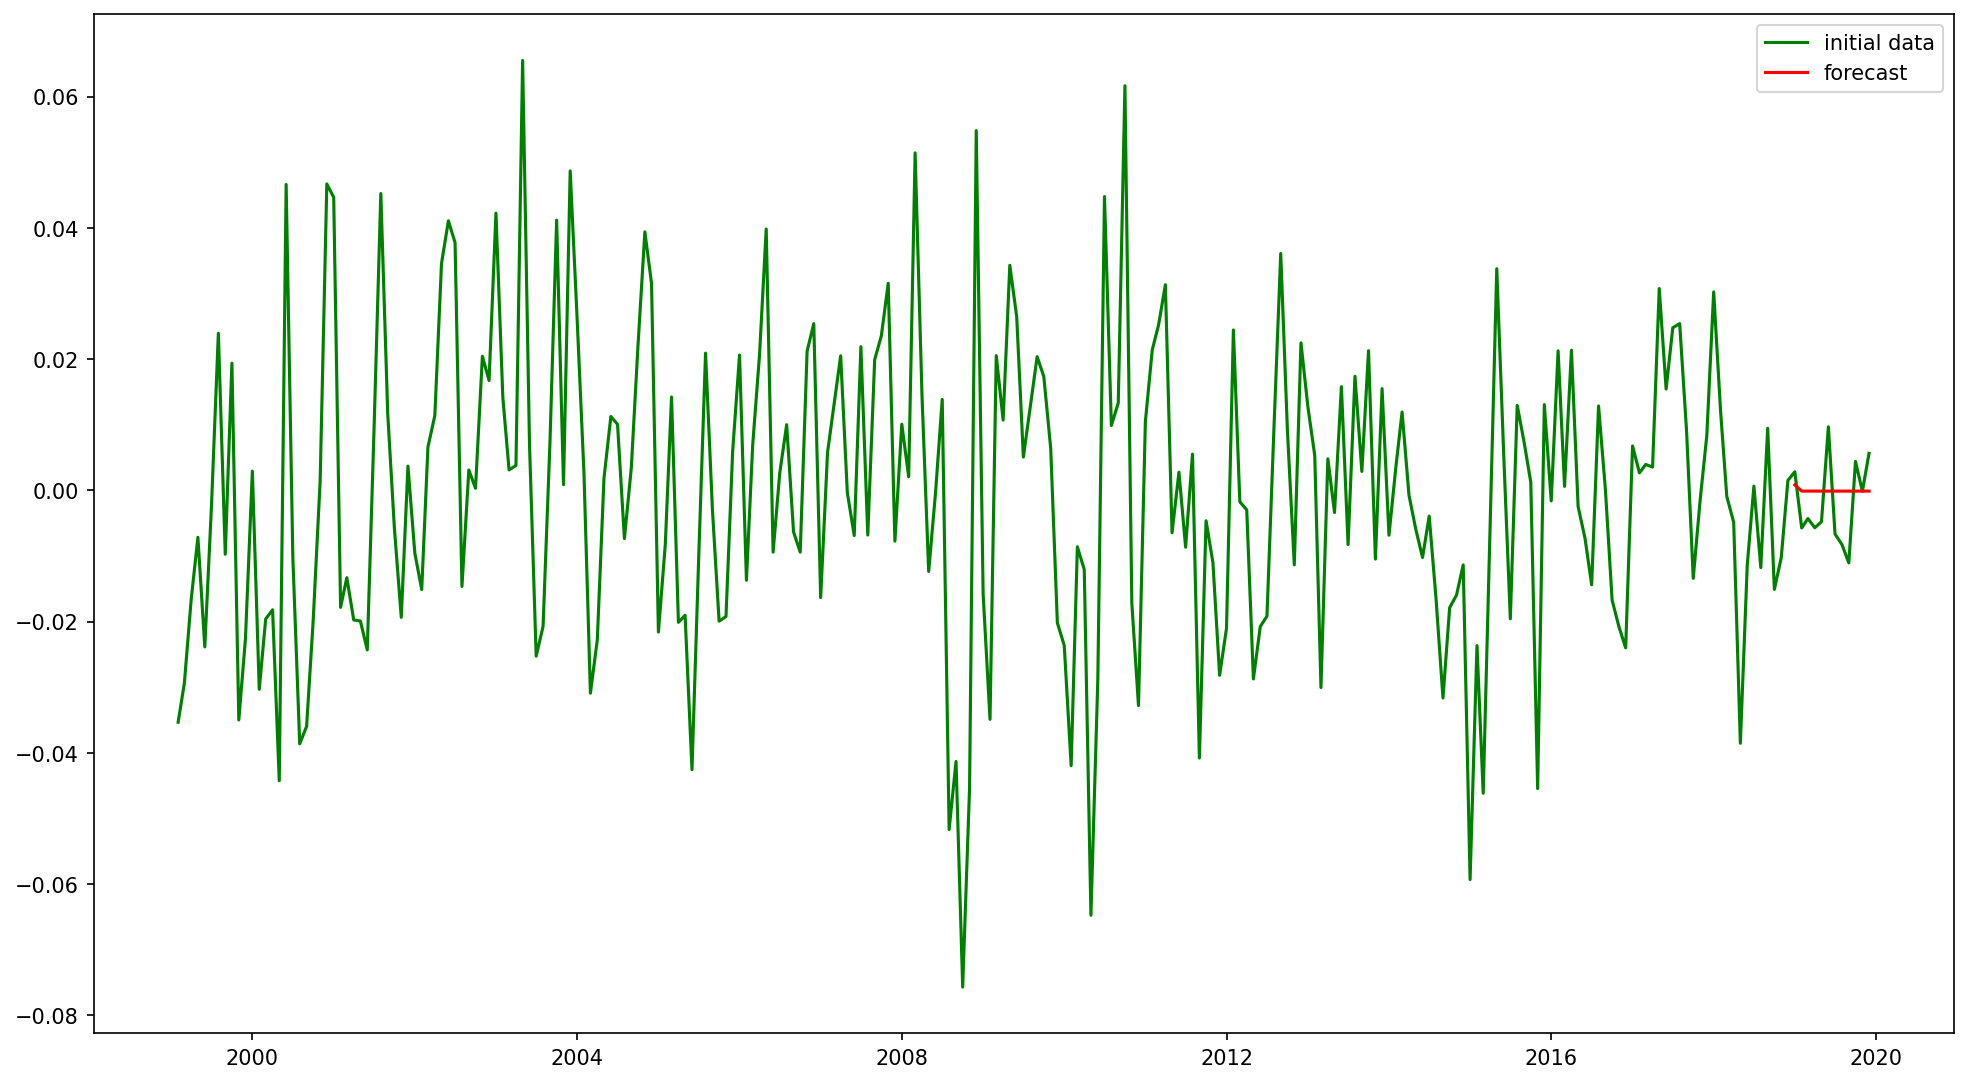

In [797]:
fig, ax = plt.subplots()
ax.plot(df['ccr'], color = 'green', label = 'initial data')
ax.plot(forecast, color = 'red', label = 'forecast')
plt.legend()
plt.show()

**(9) Compare the forecasting accuracy for the models using mean squared error, mean absolute
error and some other reasonable accuracy measure of your choice.**

Точность прогноза можно определить: 
* графически - визульно сравнить прогнозные значениями с реализациями
* посчитать статистики Mean squared prediction errors, Mean absolute prediction errors, Mean absolute percentage error 

In [798]:
data = pd.DataFrame(columns = ['ccr', 'forecast'])
data['ccr'] = df['ccr'].tail(12)
data['forecast'] = forecast
#если надо смэтчить весь датасет
#data['ccr+forecast'].iloc[:-12] = data['ccr'].iloc[:-12]
#data['ccr_arma'] = arima_01_dec18.predict().to_frame()
#data['ccr_arma'].iloc[-12:] = forecast
#pd.to_numeric(data['ccr'],data['ccr_arma'])

In [799]:
data

,ccr,forecast
month,,
2019-01-01,0.002824,0.000813
2019-02-01,-0.005733,-0.000115
2019-03-01,-0.004297,-0.000115
2019-04-01,-0.005699,-0.000115
2019-05-01,-0.004786,-0.000115
2019-06-01,0.009682,-0.000115
2019-07-01,-0.006664,-0.000115
2019-08-01,-0.008249,-0.000115
2019-09-01,-0.011056,-0.000115


In [800]:
data['error'] = data['ccr'] - data['forecast']
data['square_error'] = data['error'] ** 2 
data['error_abs'] = data['error'].abs()
data['error_pct'] = data['error'] / data['ccr']
data['abs_pct_error'] = data['error_pct'].abs()
data

,ccr,forecast,error,square_error,error_abs,error_pct,abs_pct_error
month,,,,,,,
2019-01-01,0.002824,0.000813,0.002011,4.044445e-06,0.002011,0.712016,0.712016
2019-02-01,-0.005733,-0.000115,-0.005617,3.155524e-05,0.005617,0.979882,0.979882
2019-03-01,-0.004297,-0.000115,-0.004182,1.748545e-05,0.004182,0.973160,0.973160
2019-04-01,-0.005699,-0.000115,-0.005584,3.117774e-05,0.005584,0.979763,0.979763
2019-05-01,-0.004786,-0.000115,-0.004671,2.181704e-05,0.004671,0.975904,0.975904
2019-06-01,0.009682,-0.000115,0.009797,9.597876e-05,0.009797,1.011912,1.011912
2019-07-01,-0.006664,-0.000115,-0.006549,4.288625e-05,0.006549,0.982694,0.982694
2019-08-01,-0.008249,-0.000115,-0.008134,6.615680e-05,0.008134,0.986019,0.986019
2019-09-01,-0.011056,-0.000115,-0.010940,1.196902e-04,0.010940,0.989568,0.989568


In [801]:
mse = data['square_error'].mean()
mae = data['error_abs'].mean()
mape = data['abs_pct_error'].mean()
print('Mean squared prediction errors:', round(mse, 10),'\n',
      'Mean absolute errors:', round(mae,4),'\n',
      'Mean absolute percentage error:', round(mape,4),'\n')

Mean squared prediction errors: 4.03684e-05 
 Mean absolute errors: 0.0056 
 Mean absolute percentage error: 0.9042 



MSE и MAE полезны для сравнения качества прогноза между несколькими моделями. MAPE в рамках ARIMA(0,0,1) говорит о том, что качество прогноза неудовлетворительное, так как в среднем ошибка составляет около 90% от фактического(непредсказанного) значения.
Графически это подтерждается, ряд прогнозных данных плохо повторяет предыдущий паттерн набора данных. 